In [1]:
import pandas as pd
import numpy as np
#import the relevant resources

In [2]:
churn = pd.read_csv('Churn Modeling.csv')

In [3]:
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
churn.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
churn.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
value_counts = churn['CreditScore'].value_counts()
value_percentages = churn['CreditScore'].value_counts(normalize=True) * 100
print(pd.concat([value_counts, value_percentages], axis=1, keys=['Counts', 'Percentages']))

     Counts  Percentages
850     233         2.33
678      63         0.63
655      54         0.54
705      53         0.53
667      53         0.53
..      ...          ...
404       1         0.01
351       1         0.01
365       1         0.01
417       1         0.01
419       1         0.01

[460 rows x 2 columns]


In [9]:
def get_bin(score):
    if score < 400:
        return 'Very bad'
    elif score < 500:
        return 'bad'
    elif score < 600:
        return 'ok'
    elif score < 700:
        return 'good'
    else:
        return 'excelent'

churn['binned_credit_score'] = churn['CreditScore'].apply(get_bin)

print(churn[['CreditScore', 'binned_credit_score']])


      CreditScore binned_credit_score
0             619                good
1             608                good
2             502                  ok
3             699                good
4             850            excelent
...           ...                 ...
9995          771            excelent
9996          516                  ok
9997          709            excelent
9998          772            excelent
9999          792            excelent

[10000 rows x 2 columns]


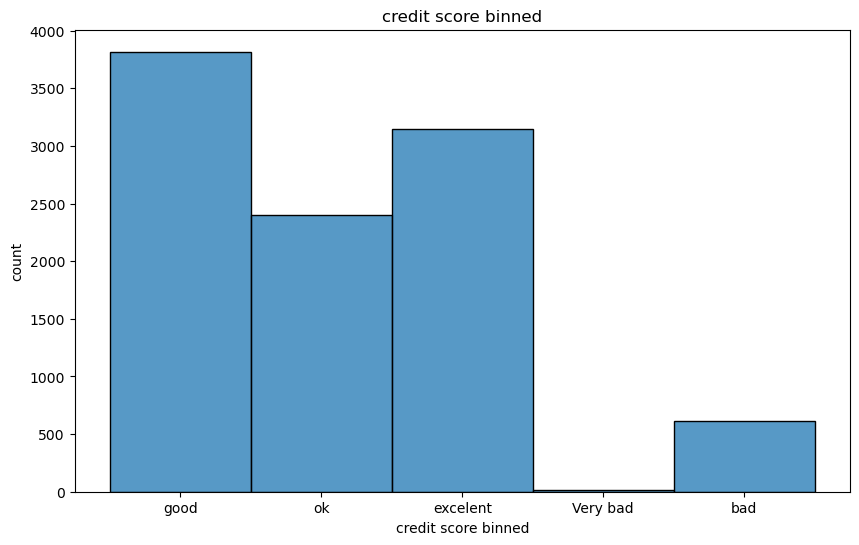

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(churn['binned_credit_score'])
plt.title('credit score binned')
plt.xlabel('credit score binned')
plt.ylabel('count')
plt.show()


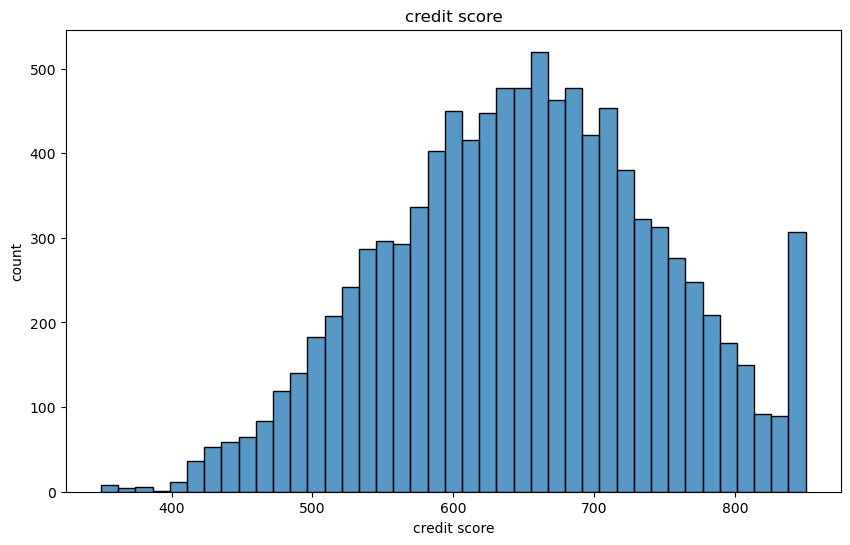

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(churn['CreditScore'])
plt.title('credit score')
plt.xlabel('credit score')
plt.ylabel('count')
plt.show()

In [12]:
#most credit scores are less than 700 and above 600

In [13]:
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited binned_credit_score  
0        101348.88       1                good  
1        112542.58       0                good  
2        113931.57       1                  ok  
3         93826.63       0                good  
4         79084.10       0            excelent

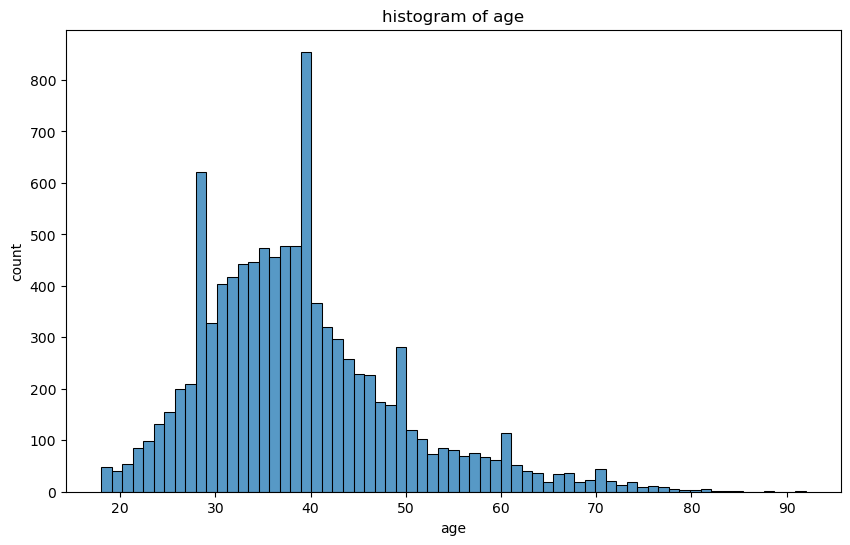

In [14]:

plt.figure(figsize=(10,6))
sns.histplot(churn['Age'])
plt.title('histogram of age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()


In [15]:
#most customers are between late 20s to late 40s

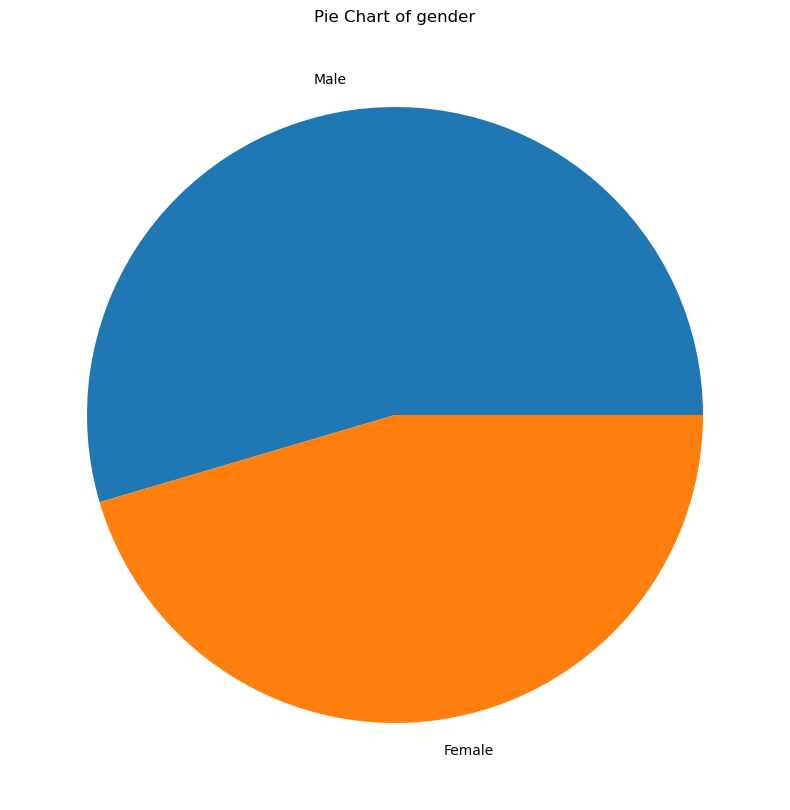

In [16]:
plt.figure(figsize=(10, 10))
churn['Gender'].value_counts().plot(kind='pie')
plt.title(f'Pie Chart of gender')
plt.ylabel('')  # This removes the y-label
plt.show()

In [17]:
value_counts = churn['Gender'].value_counts()
value_percentages = churn['Gender'].value_counts(normalize=True) * 100
print(pd.concat([value_counts, value_percentages], axis=1, keys=['Counts', 'Percentages']))


        Counts  Percentages
Male      5457        54.57
Female    4543        45.43


In [18]:
#slightly more men then females

In [19]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

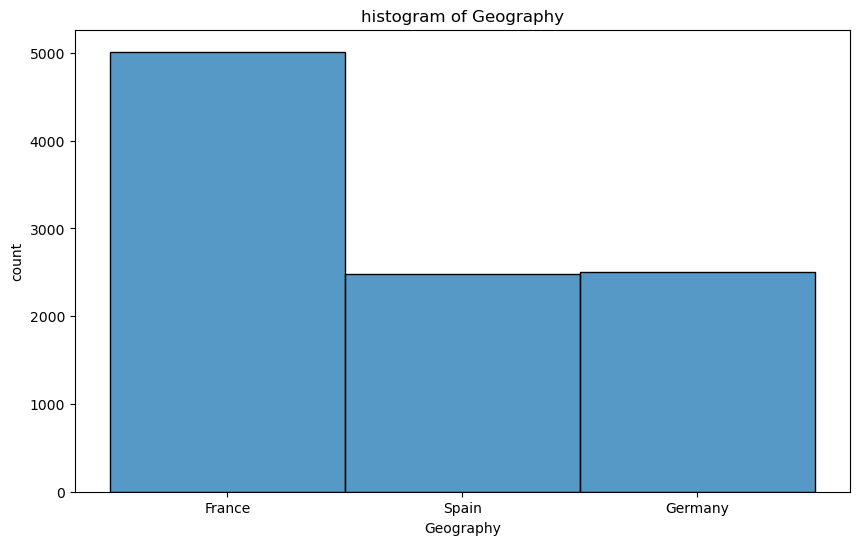

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(churn['Geography'])
plt.title('histogram of Geography')
plt.xlabel('Geography')
plt.ylabel('count')
plt.show()

In [21]:
#most customers are from france

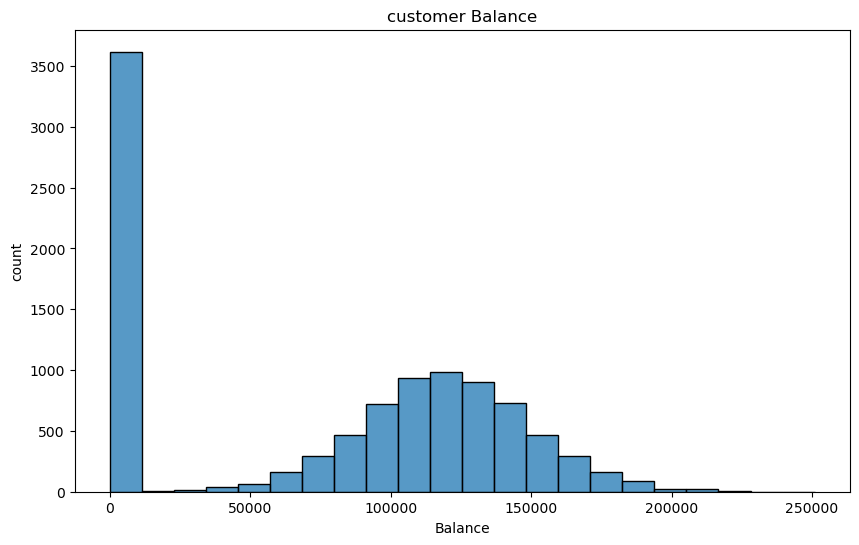

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(churn['Balance'])
plt.title('customer Balance')
plt.xlabel('Balance')
plt.ylabel('count')
plt.show()

In [23]:
#most customers have no money in the bank

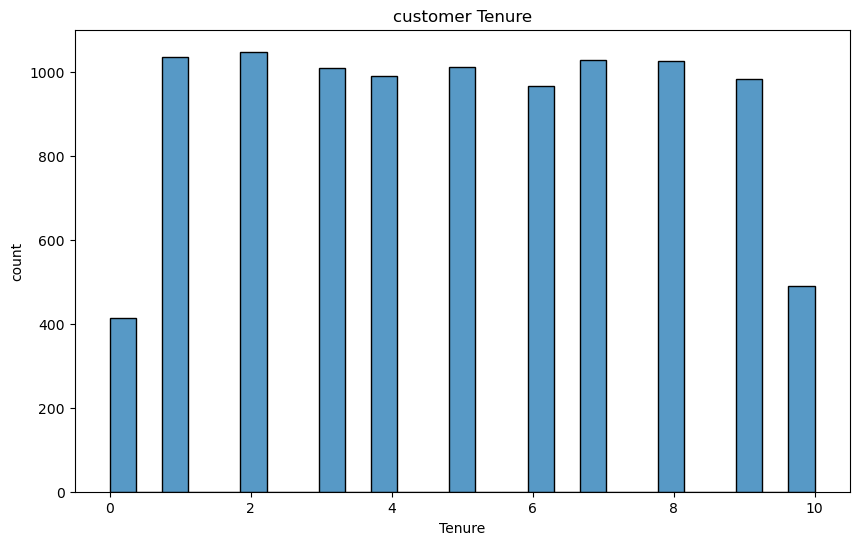

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(churn['Tenure'])
plt.title('customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('count')
plt.show()

In [25]:
# pretty even spread of how long customers stay with the bank

In [26]:
churn['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [27]:
value_counts = churn['NumOfProducts'].value_counts()
value_percentages = churn['NumOfProducts'].value_counts(normalize=True) * 100
print(pd.concat([value_counts, value_percentages], axis=1, keys=['Counts', 'Percentages']))


   Counts  Percentages
1    5084        50.84
2    4590        45.90
3     266         2.66
4      60         0.60


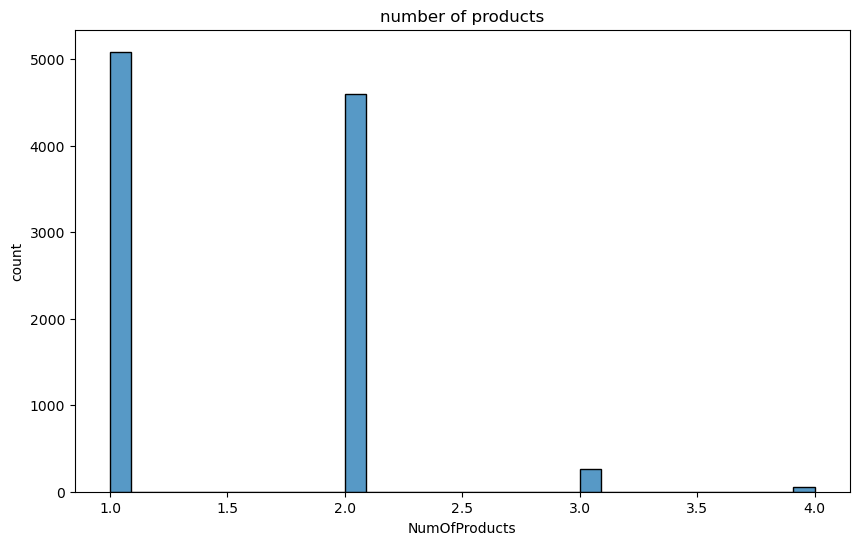

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(churn['NumOfProducts'])
plt.title('number of products')
plt.xlabel('NumOfProducts')
plt.ylabel('count')
plt.show()

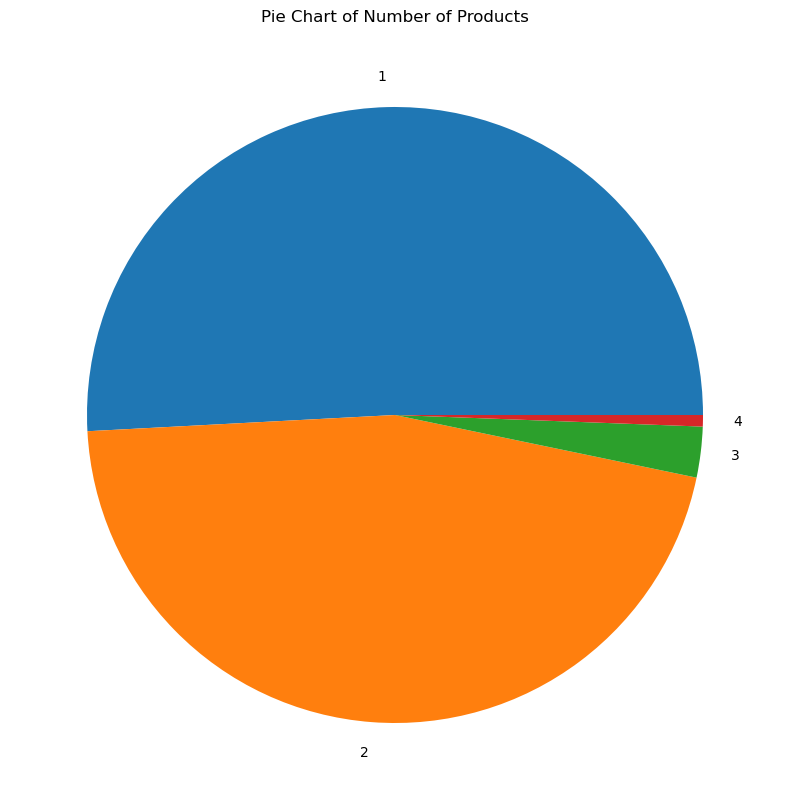

In [29]:
plt.figure(figsize=(10, 10))
churn['NumOfProducts'].value_counts().plot(kind='pie')
plt.title(f'Pie Chart of Number of Products')
plt.ylabel('')  # This removes the y-label
plt.show()

In [30]:
#most customers use one or 2 products from the customers

In [31]:
churn['HasCrCard'].unique()


array([1, 0])

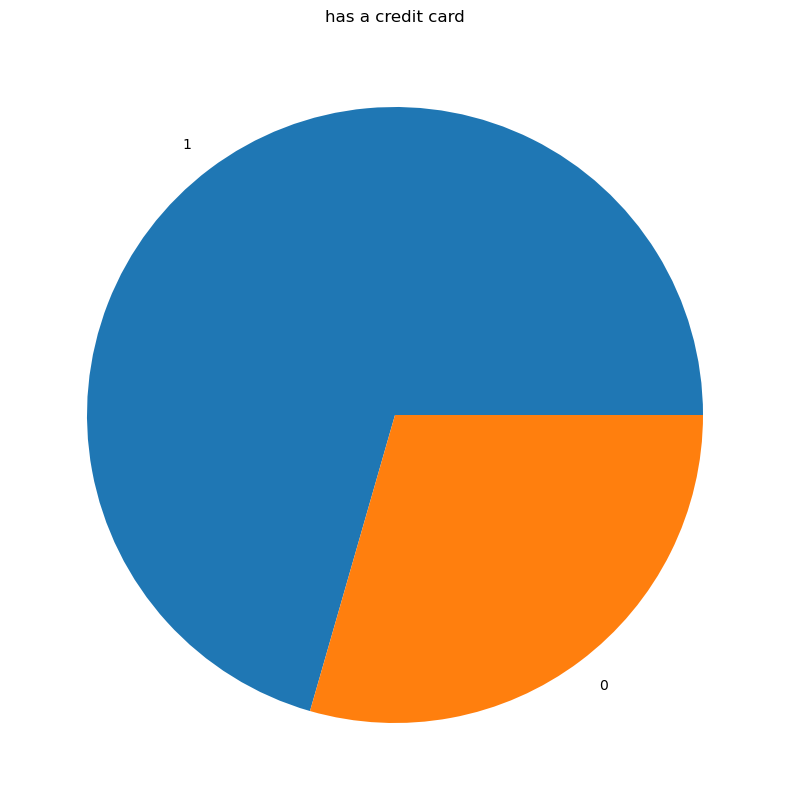

In [32]:
plt.figure(figsize=(10, 10))
churn['HasCrCard'].value_counts().plot(kind='pie')
plt.title(f'has a credit card')
plt.ylabel('')  # This removes the y-label
plt.show()

In [33]:
#most customers have a credit card

In [34]:
churn['IsActiveMember'].unique()

array([1, 0])

In [35]:
value_counts = churn['IsActiveMember'].value_counts()
value_percentages = churn['IsActiveMember'].value_counts(normalize=True) * 100
print(pd.concat([value_counts, value_percentages], axis=1, keys=['Counts', 'Percentages']))


   Counts  Percentages
1    5151        51.51
0    4849        48.49


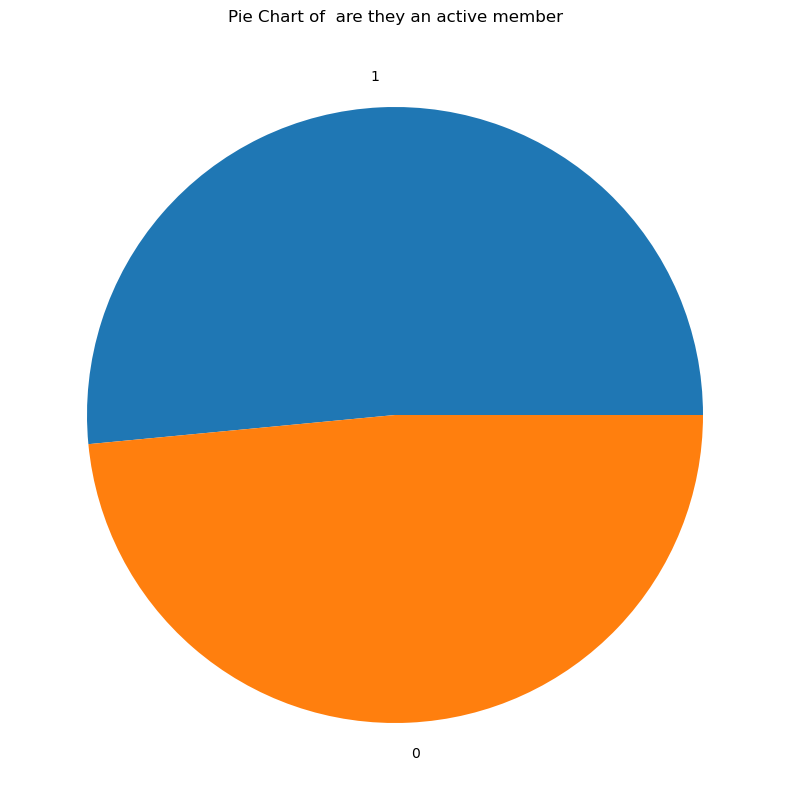

In [36]:
plt.figure(figsize=(10, 10))
churn['IsActiveMember'].value_counts().plot(kind='pie')
plt.title(f'Pie Chart of  are they an active member')
plt.ylabel('')  # This removes the y-label
plt.show()

In [37]:
#half of the customers are active members

In [38]:
churn['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

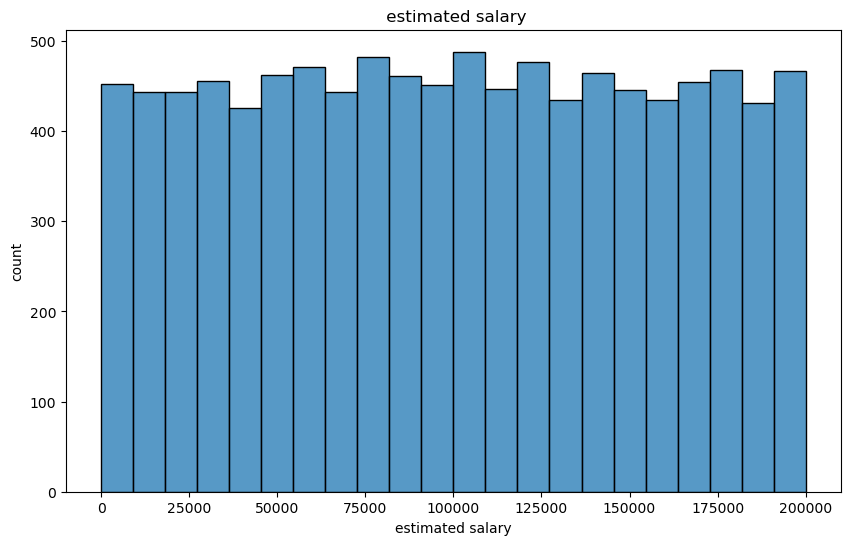

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(churn['EstimatedSalary'])
plt.title(' estimated salary')
plt.xlabel('estimated salary')
plt.ylabel('count')
plt.show()

In [40]:
#maybe there is a relationship between the estimated salary, balance, and credit scores

In [41]:
churn['Exited'].unique()

array([1, 0])

In [42]:
value_counts = churn['Exited'].value_counts()
value_percentages = churn['Exited'].value_counts(normalize=True) * 100
print(pd.concat([value_counts, value_percentages], axis=1, keys=['Counts', 'Percentages']))


   Counts  Percentages
0    7963        79.63
1    2037        20.37


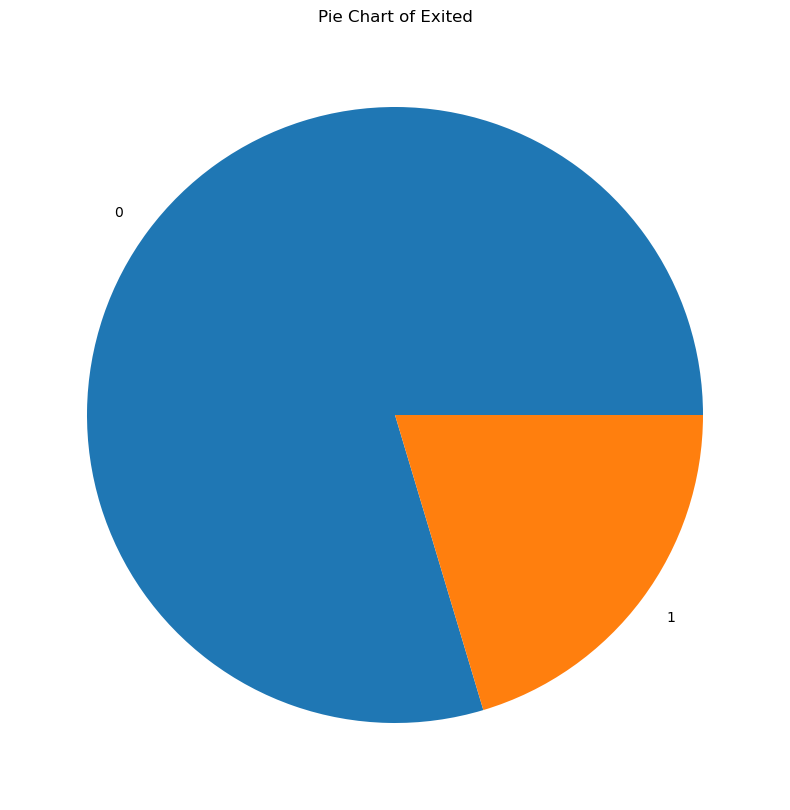

In [43]:
plt.figure(figsize=(10, 10))
churn['Exited'].value_counts().plot(kind='pie')
plt.title(f'Pie Chart of Exited')
plt.ylabel('')  # This removes the y-label
plt.show()

In [44]:
# about  20% of customers leave

In [45]:
# summary
    # estimated salary seems like there could be more features made from this
    # active membership is half of the customers
    # 20% of customers leave
    #most customers have a credit card
    #most credit scores are between 600-700
    #Most customers have at least 1 or 2 products from the comapny
    #most customers are from france, then spain and germany
    #Most customers have a balance close to 0$
    # Most customers are male
    # most customer ages are between 30-40

#questions
    #is there a connection between balance and credit score
    #the 0$ account customers do they leave more than the other customers
    #do more inactive members leave vs active members?
    #do the members that leave are active?
    # what is the gender and age of the group that leaves?

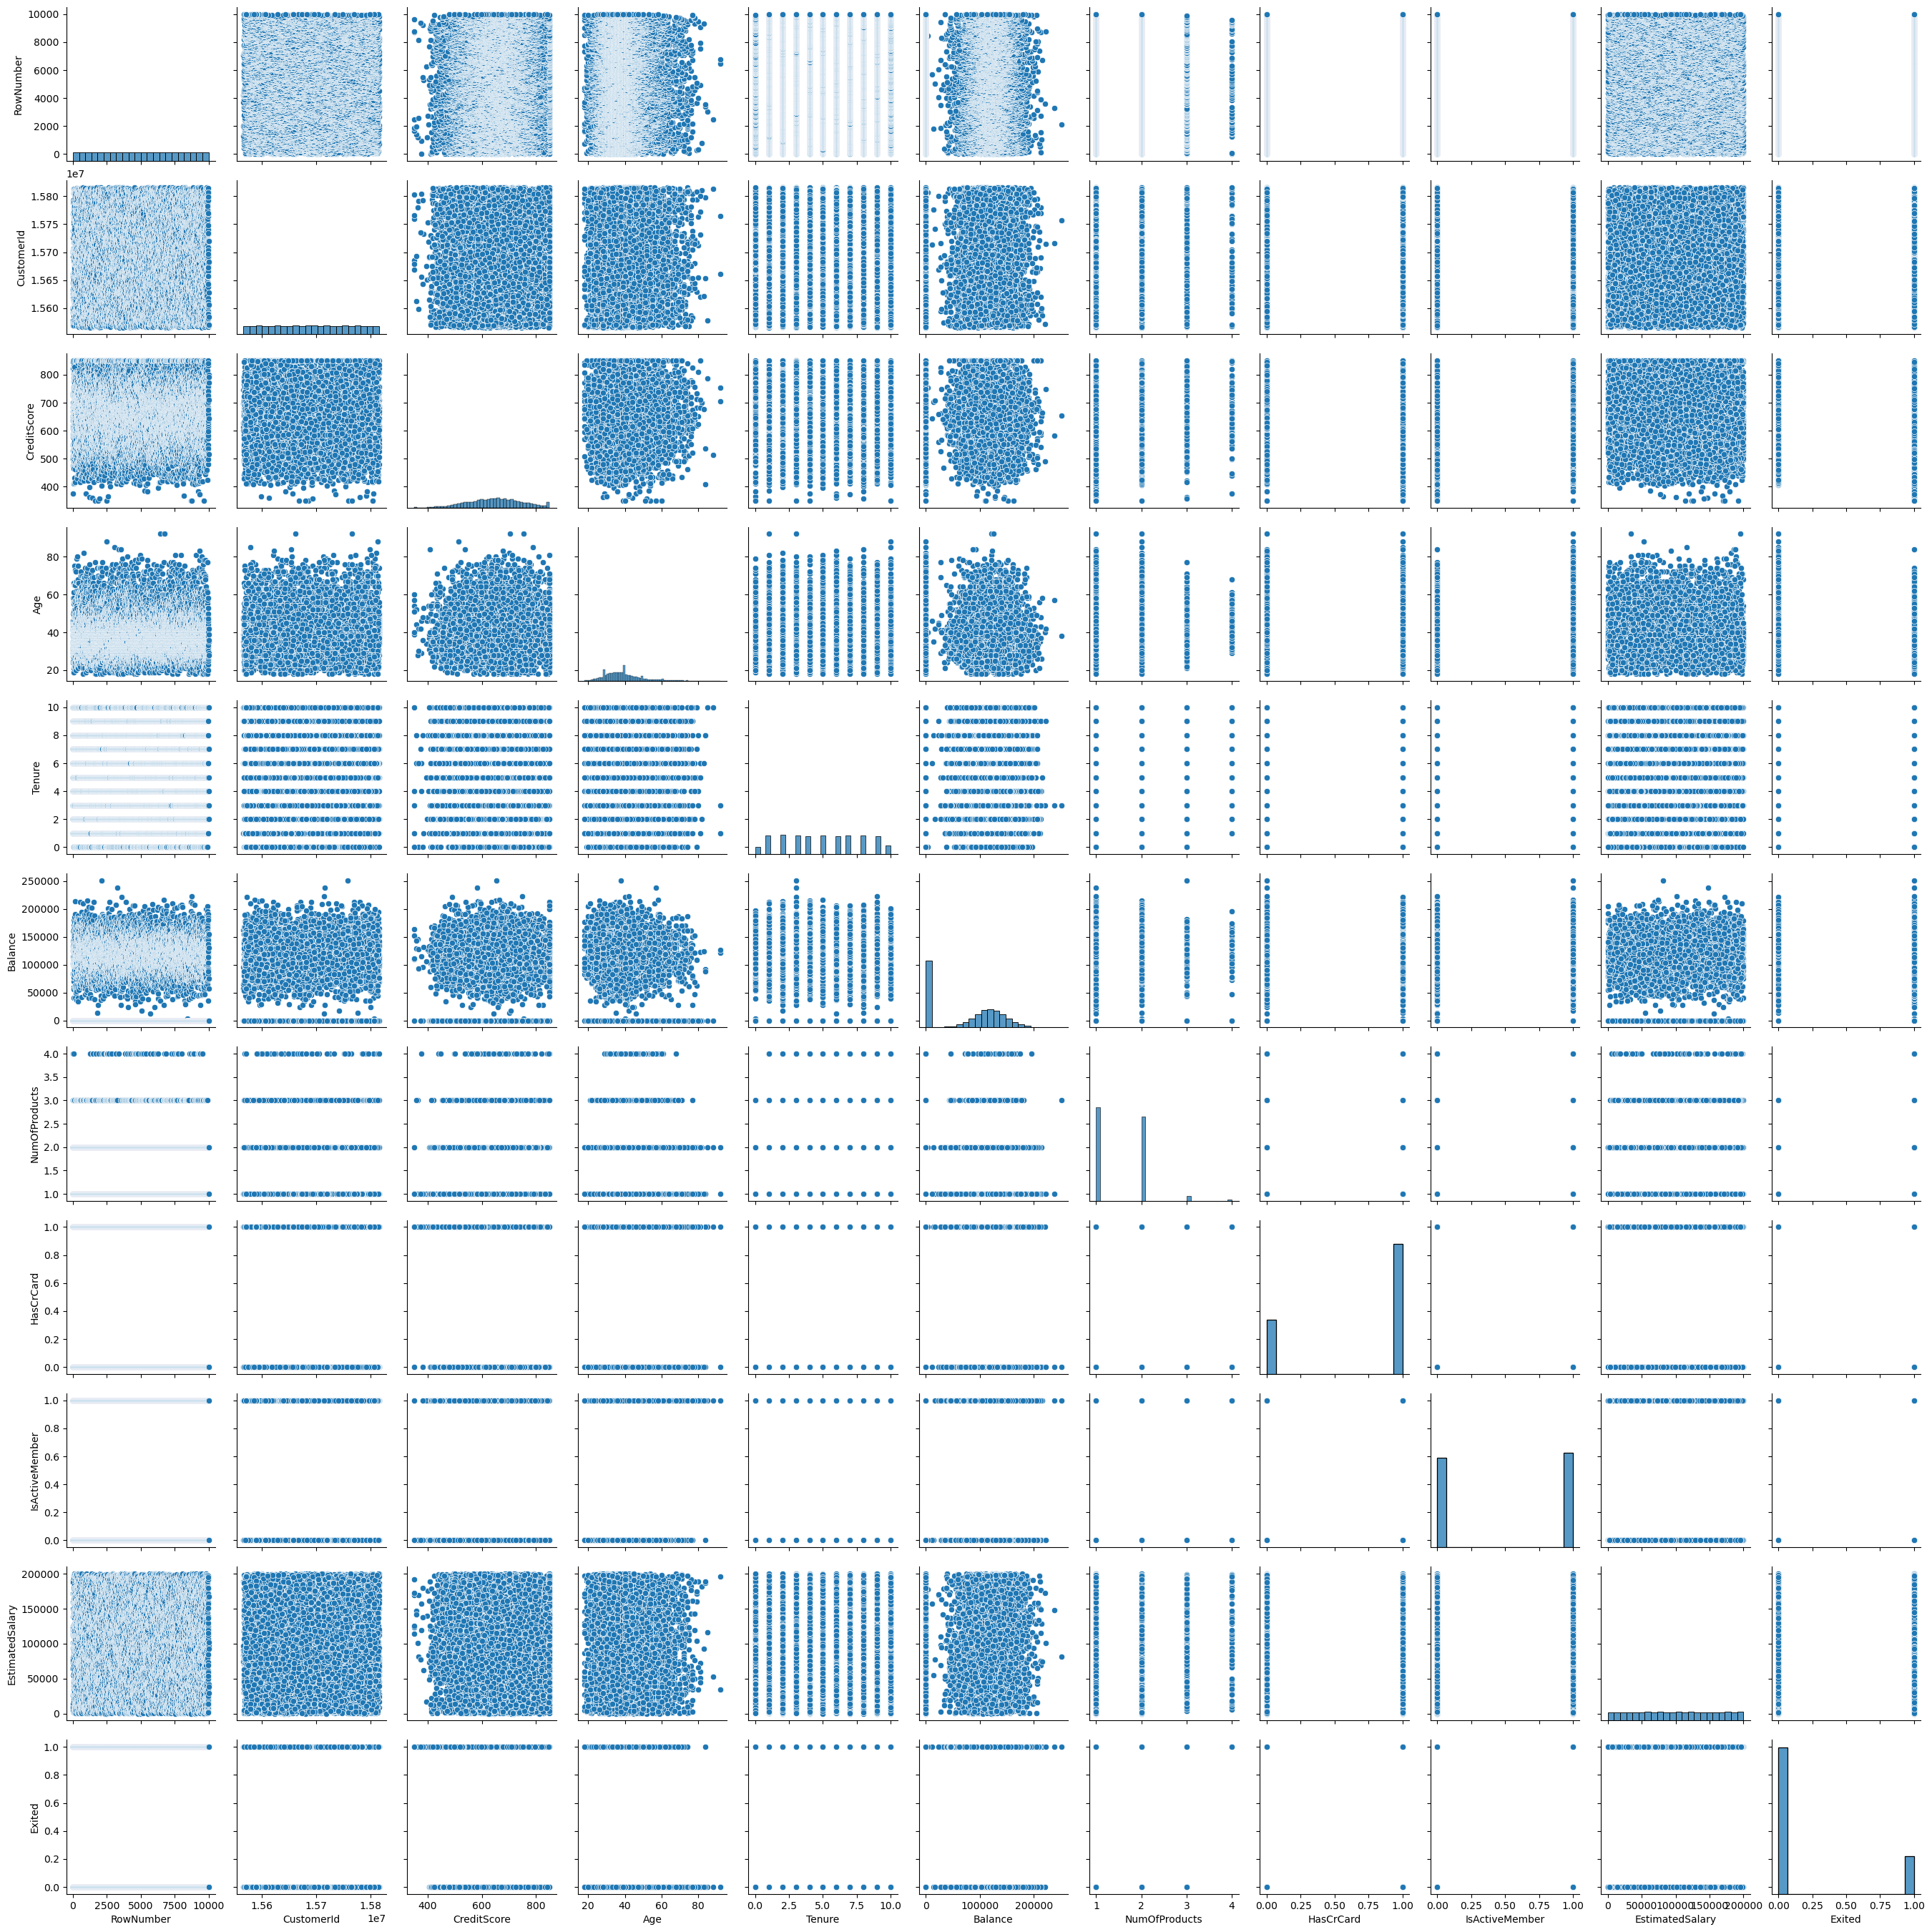

In [46]:
sns.pairplot(churn)


/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_22326/547297862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn.corr(), annot=True)


<Axes: >

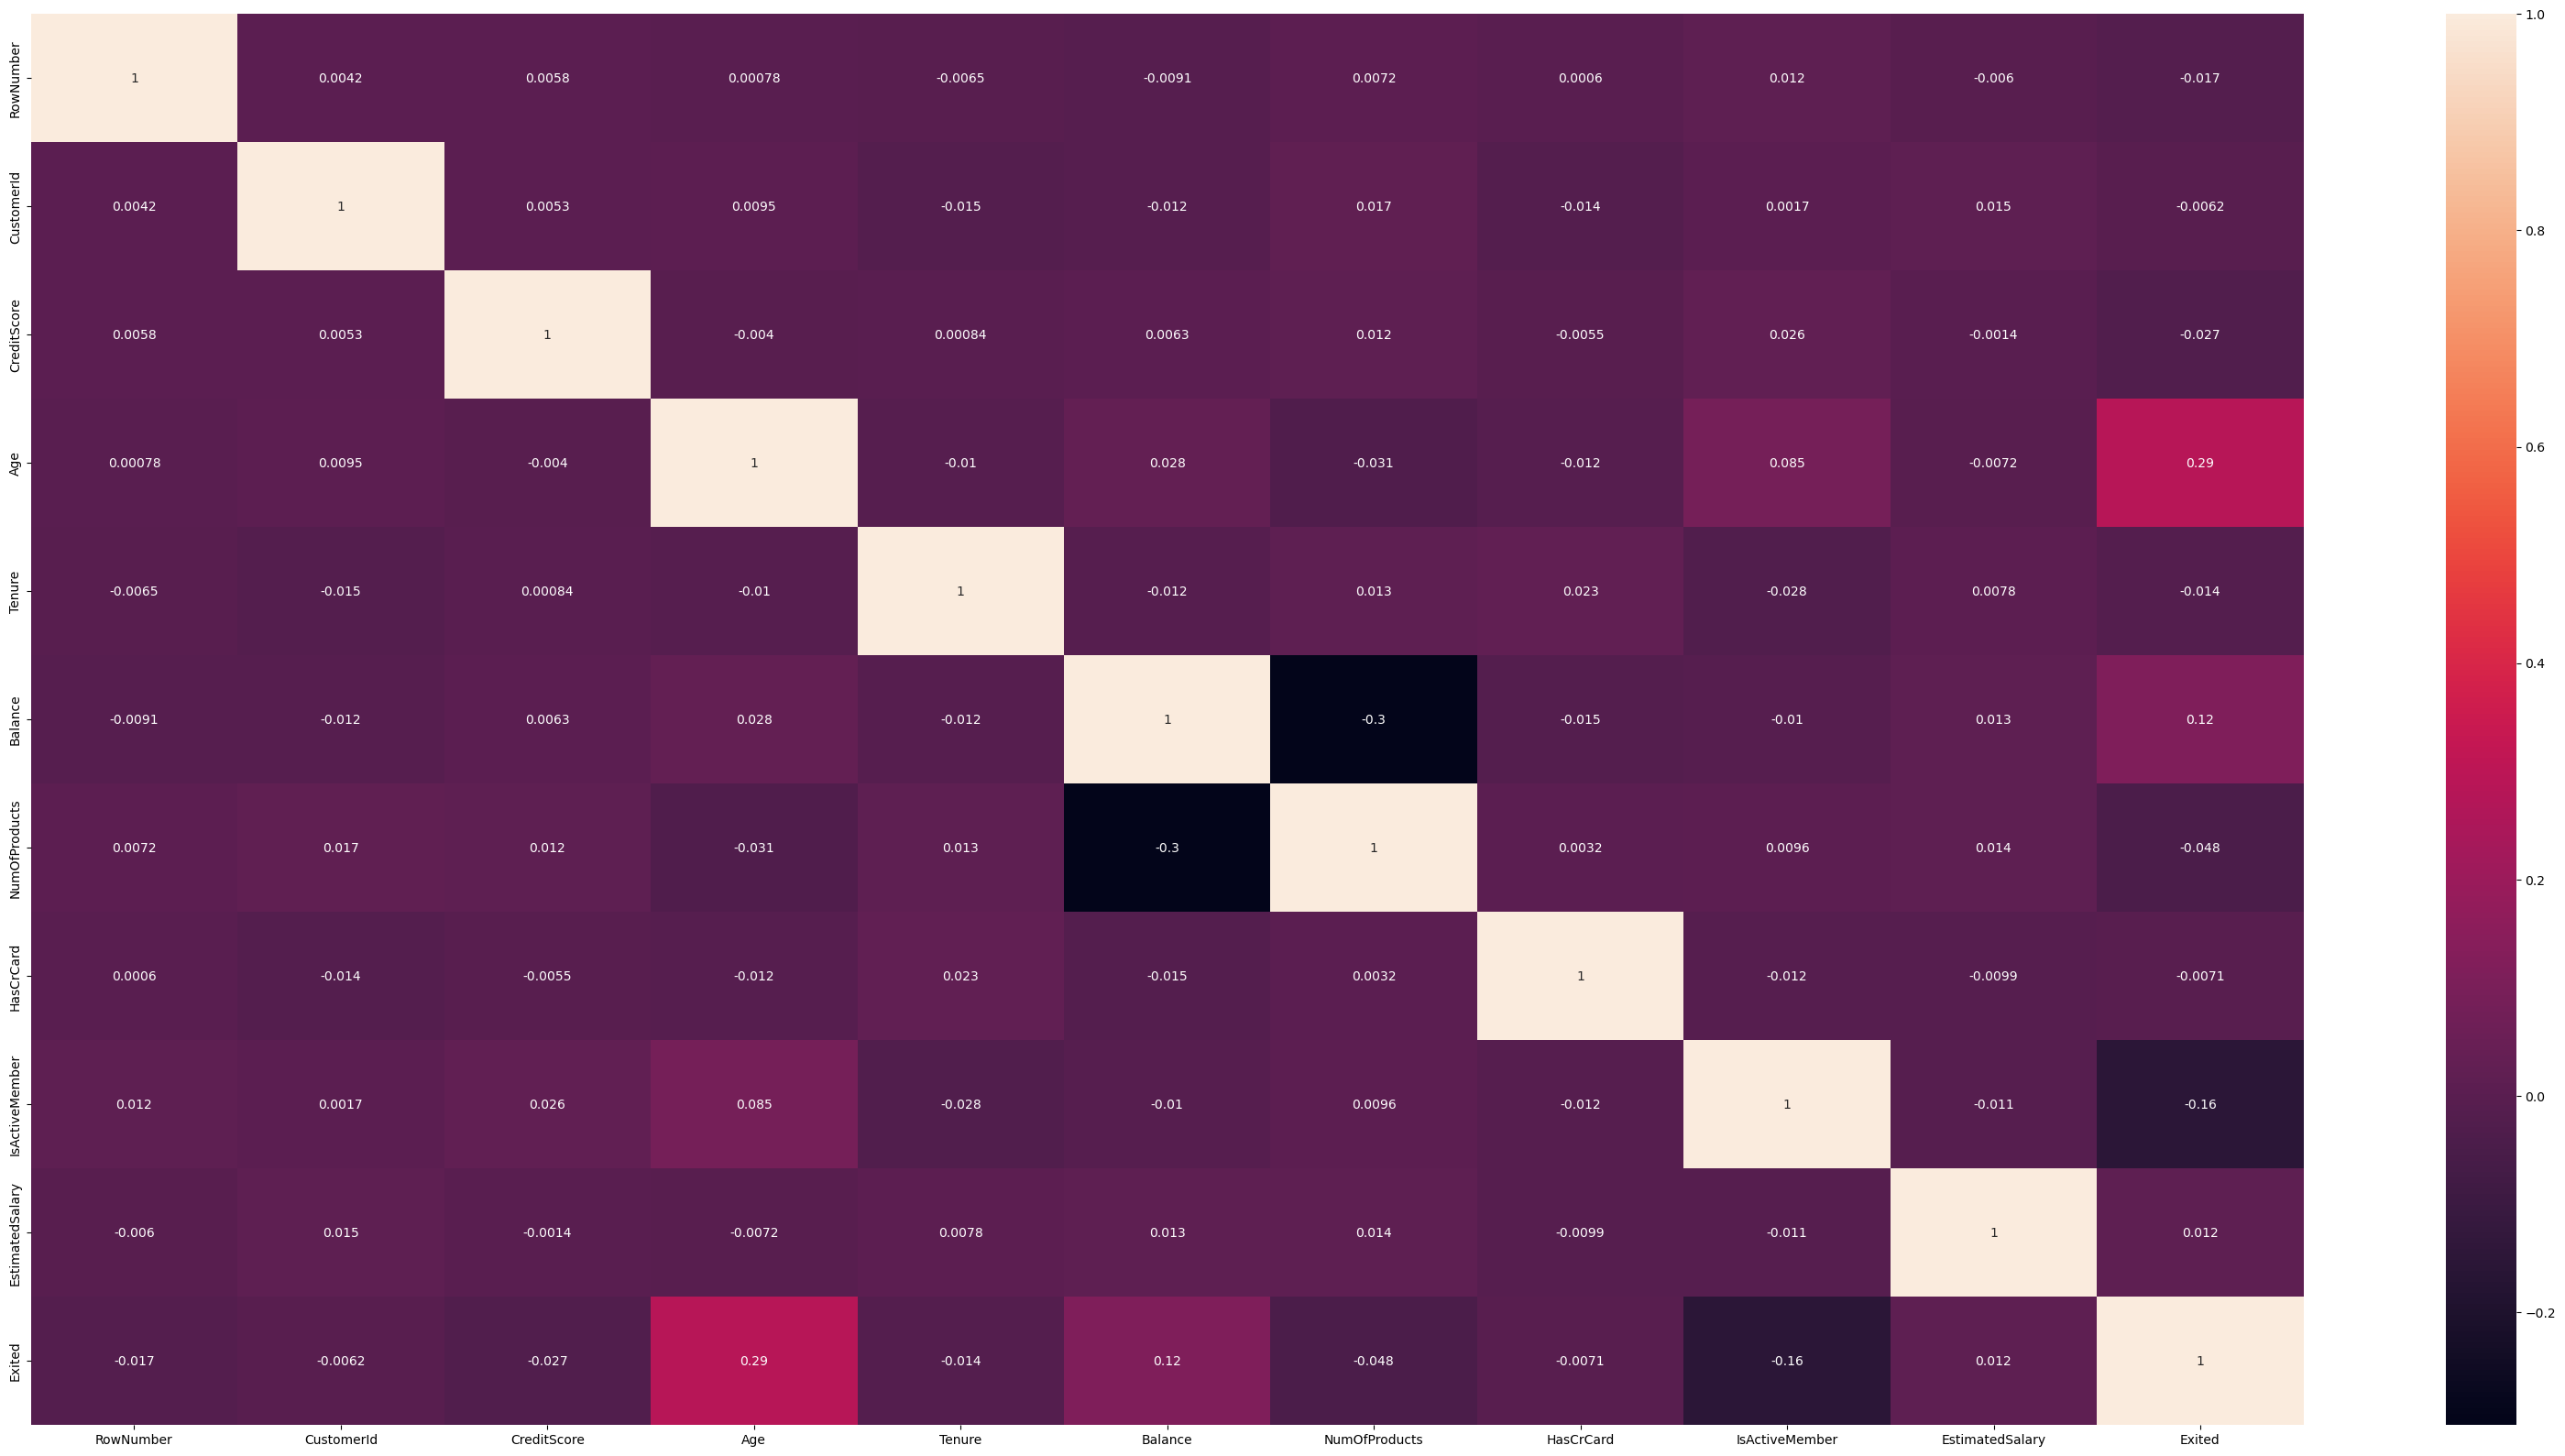

In [47]:
plt.figure(figsize=(40, 20))

sns.heatmap(churn.corr(), annot=True)

In [48]:
#very low correlation between existing features
#maybe we can make new features

In [49]:
pivot_table = churn.pivot_table(index='Exited', columns='Balance', aggfunc='size', fill_value=0)
pivot_table.head()

Balance  0.00       3768.69    12459.19   14262.80   16893.59   23503.31   \
Exited                                                                      
0             3117          0          0          1          1          0   
1              500          1          1          0          0          1   

Balance  24043.45   27288.43   27517.15   27755.97   ...  212692.97  \
Exited                                               ...              
0                0          1          1          0  ...          1   
1                1          0          0          1  ...          0   

Balance  212696.32  212778.20  213146.20  214346.96  216109.88  221532.80  \
Exited                                                                      
0                1          1          0          1          0          1   
1                0          0          1          0          1          0   

Balance  222267.63  238387.56  250898.09  
Exited                                    
0                0          0          0  
1                1          1          1  

[2 rows x 6382 columns]

In [50]:
def get_bin_bal(balance):
    if balance < 1:
        return 'empty'
    elif balance < 50000:
        return '0-50k'
    elif balance < 100000:
        return '50-100k'
    elif balance < 150000:
        return '100-150K'
    elif balance < 200000:
        return '150-200K'
    else:
        return 'over 200k'

churn['binned_balance'] = churn['Balance'].apply(get_bin_bal)

print(churn[['Balance', 'binned_balance']])


        Balance binned_balance
0          0.00          empty
1      83807.86        50-100k
2     159660.80       150-200K
3          0.00          empty
4     125510.82       100-150K
...         ...            ...
9995       0.00          empty
9996   57369.61        50-100k
9997       0.00          empty
9998   75075.31        50-100k
9999  130142.79       100-150K

[10000 rows x 2 columns]


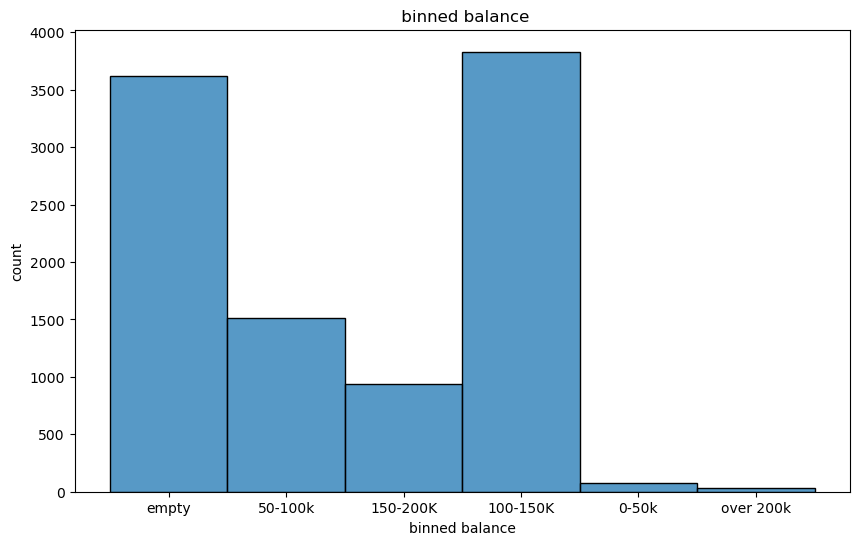

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(churn['binned_balance'])
plt.title(' binned balance')
plt.xlabel('binned balance')
plt.ylabel('count')
plt.show()

In [52]:
# lets just look at the Exited customers
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited binned_credit_score binned_balance  
0        101348.88       1                good          empty  
1        112542.58       0                good        50-100k  
2        113931.57       1                  ok       150-200K  
3         93826.63       0                good          empty  
4         79084.10       0            excelent       100-150K

In [53]:
churn['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

In [54]:
churn['Exited'].unique()

array([1, 0])

In [55]:
churned_customers = churn[churn['Exited'] == 1]


In [56]:
churned_customers.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0           1    15634602  Hargrave          619    France  Female   42   
2           3    15619304      Onio          502    France  Female   42   
5           6    15574012       Chu          645     Spain    Male   44   
7           8    15656148    Obinna          376   Germany  Female   29   
16         17    15737452     Romeo          653   Germany    Male   58   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
2        8  159660.80              3          1               0   
5        8  113755.78              2          1               0   
7        4  115046.74              4          1               0   
16       1  132602.88              1          1               0   

    EstimatedSalary  Exited binned_credit_score binned_balance  
0         101348.88       1                good          empty  
2         113931.57       1                  ok       150-200K  
5         149756.71       1                good       100-150K  
7         119346.88       1            Very bad       100-150K  
16          5097.67       1                good       100-150K

In [57]:
churned_customers.describe()

RowNumber    CustomerId  CreditScore          Age       Tenure  \
count  2037.000000  2.037000e+03  2037.000000  2037.000000  2037.000000   
mean   4905.917526  1.569005e+07   645.351497    44.837997     4.932744   
std    2866.855245  7.269262e+04   100.321503     9.761562     2.936106   
min       1.000000  1.556571e+07   350.000000    18.000000     0.000000   
25%    2419.000000  1.562736e+07   578.000000    38.000000     2.000000   
50%    4871.000000  1.568896e+07   646.000000    45.000000     5.000000   
75%    7404.000000  1.575309e+07   716.000000    51.000000     8.000000   
max    9999.000000  1.581566e+07   850.000000    84.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    2037.000000    2037.000000  2037.000000     2037.000000   
mean    91108.539337       1.475209     0.699067        0.360825   
std     58360.794816       0.801521     0.458776        0.480358   
min         0.000000       1.000000     0.000000        0.000000   
25%     38340.020000       1.000000     0.000000        0.000000   
50%    109349.290000       1.000000     1.000000        0.000000   
75%    131433.330000       2.000000     1.000000        1.000000   
max    250898.090000       4.000000     1.000000        1.000000   

       EstimatedSalary  Exited  
count      2037.000000  2037.0  
mean     101465.677531     1.0  
std       57912.418071     0.0  
min          11.580000     1.0  
25%       51907.720000     1.0  
50%      102460.840000     1.0  
75%      152422.910000     1.0  
max      199808.100000     1.0

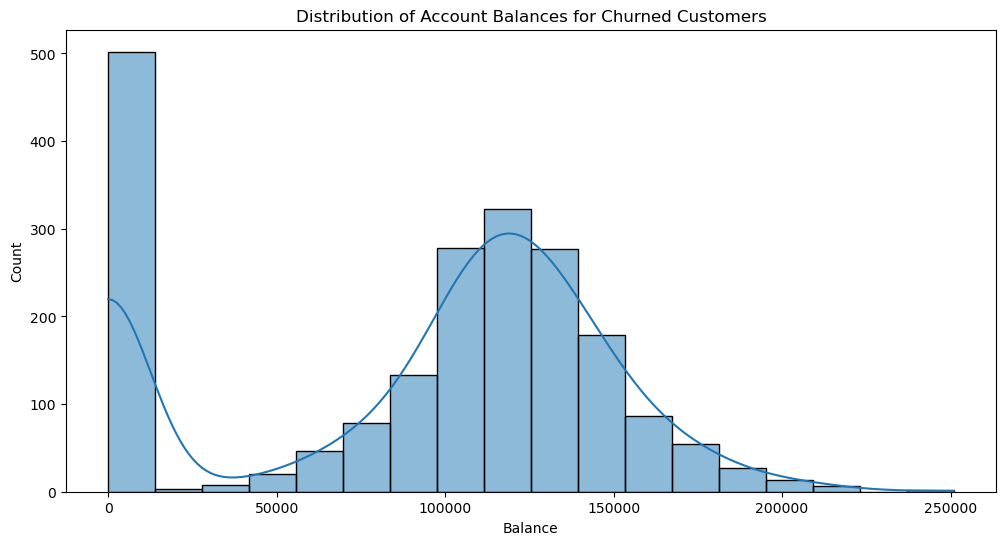

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(churned_customers['Balance'], kde=True)
plt.title('Distribution of Account Balances for Churned Customers')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

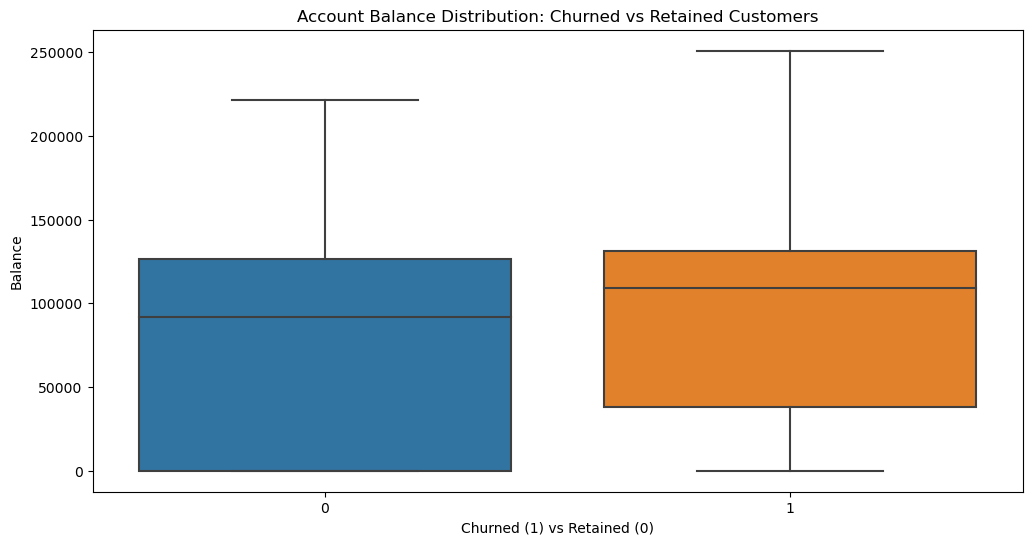

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Balance', data=churn)
plt.title('Account Balance Distribution: Churned vs Retained Customers')
plt.xlabel('Churned (1) vs Retained (0)')
plt.ylabel('Balance')
plt.show()

In [60]:
#we can see more of the churned customers had 0 dollars
#but it is not definitive

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_22326/918587558.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churned_customers.corr()


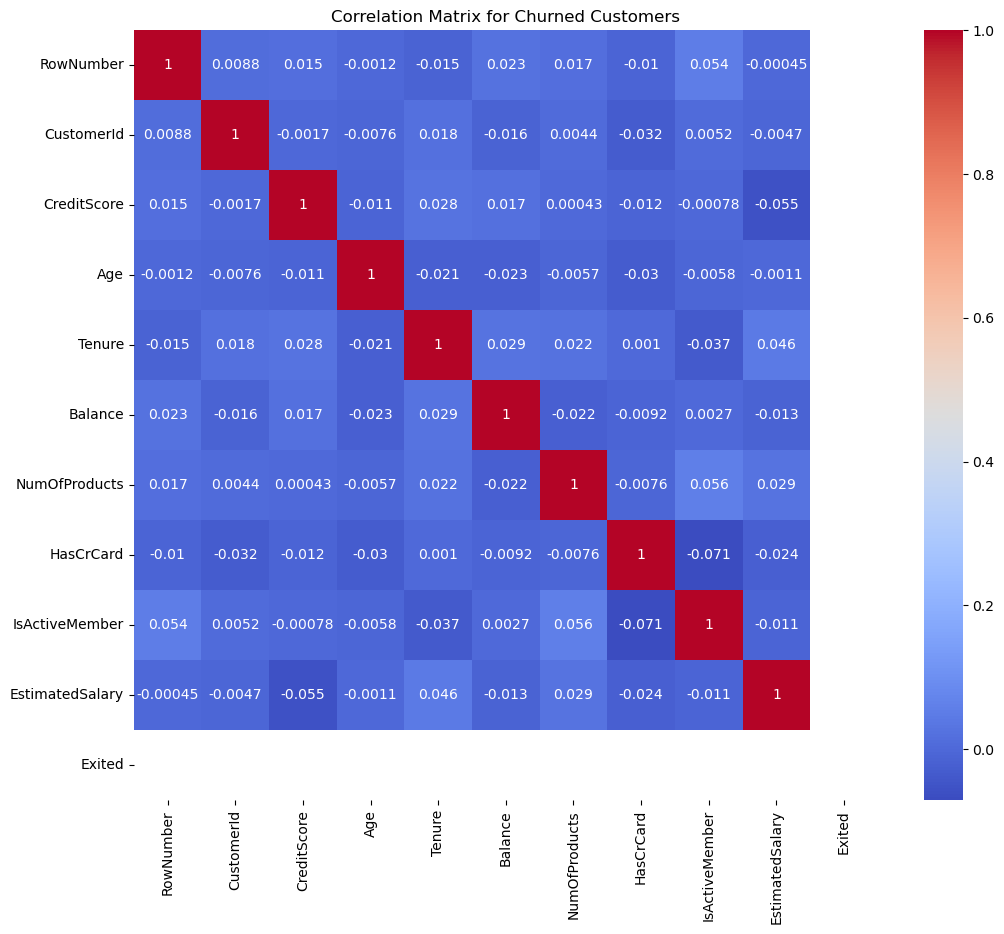

In [61]:
correlation_matrix = churned_customers.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Churned Customers')
plt.show()

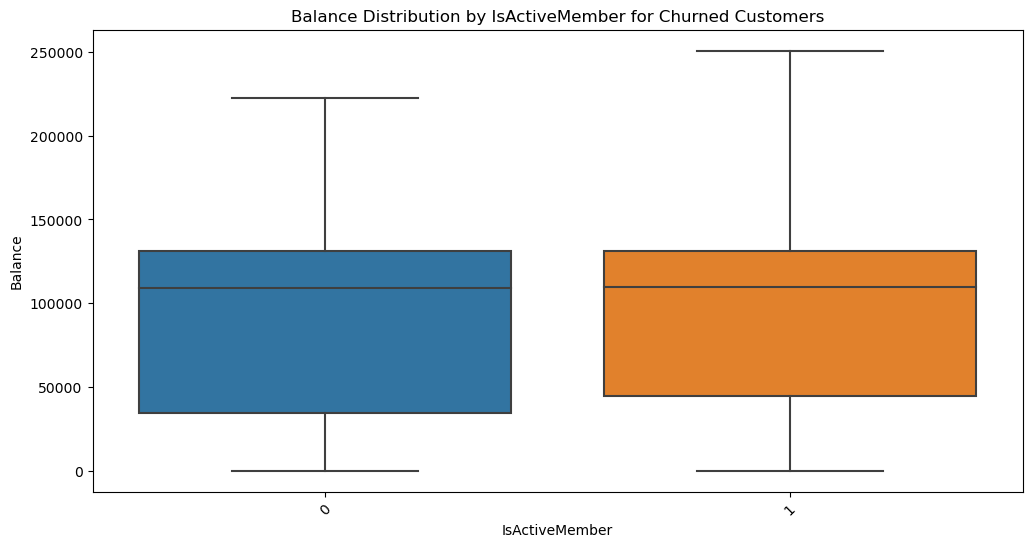

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsActiveMember', y='Balance', data=churned_customers)
plt.title('Balance Distribution by IsActiveMember for Churned Customers')
plt.xticks(rotation=45)
plt.show()

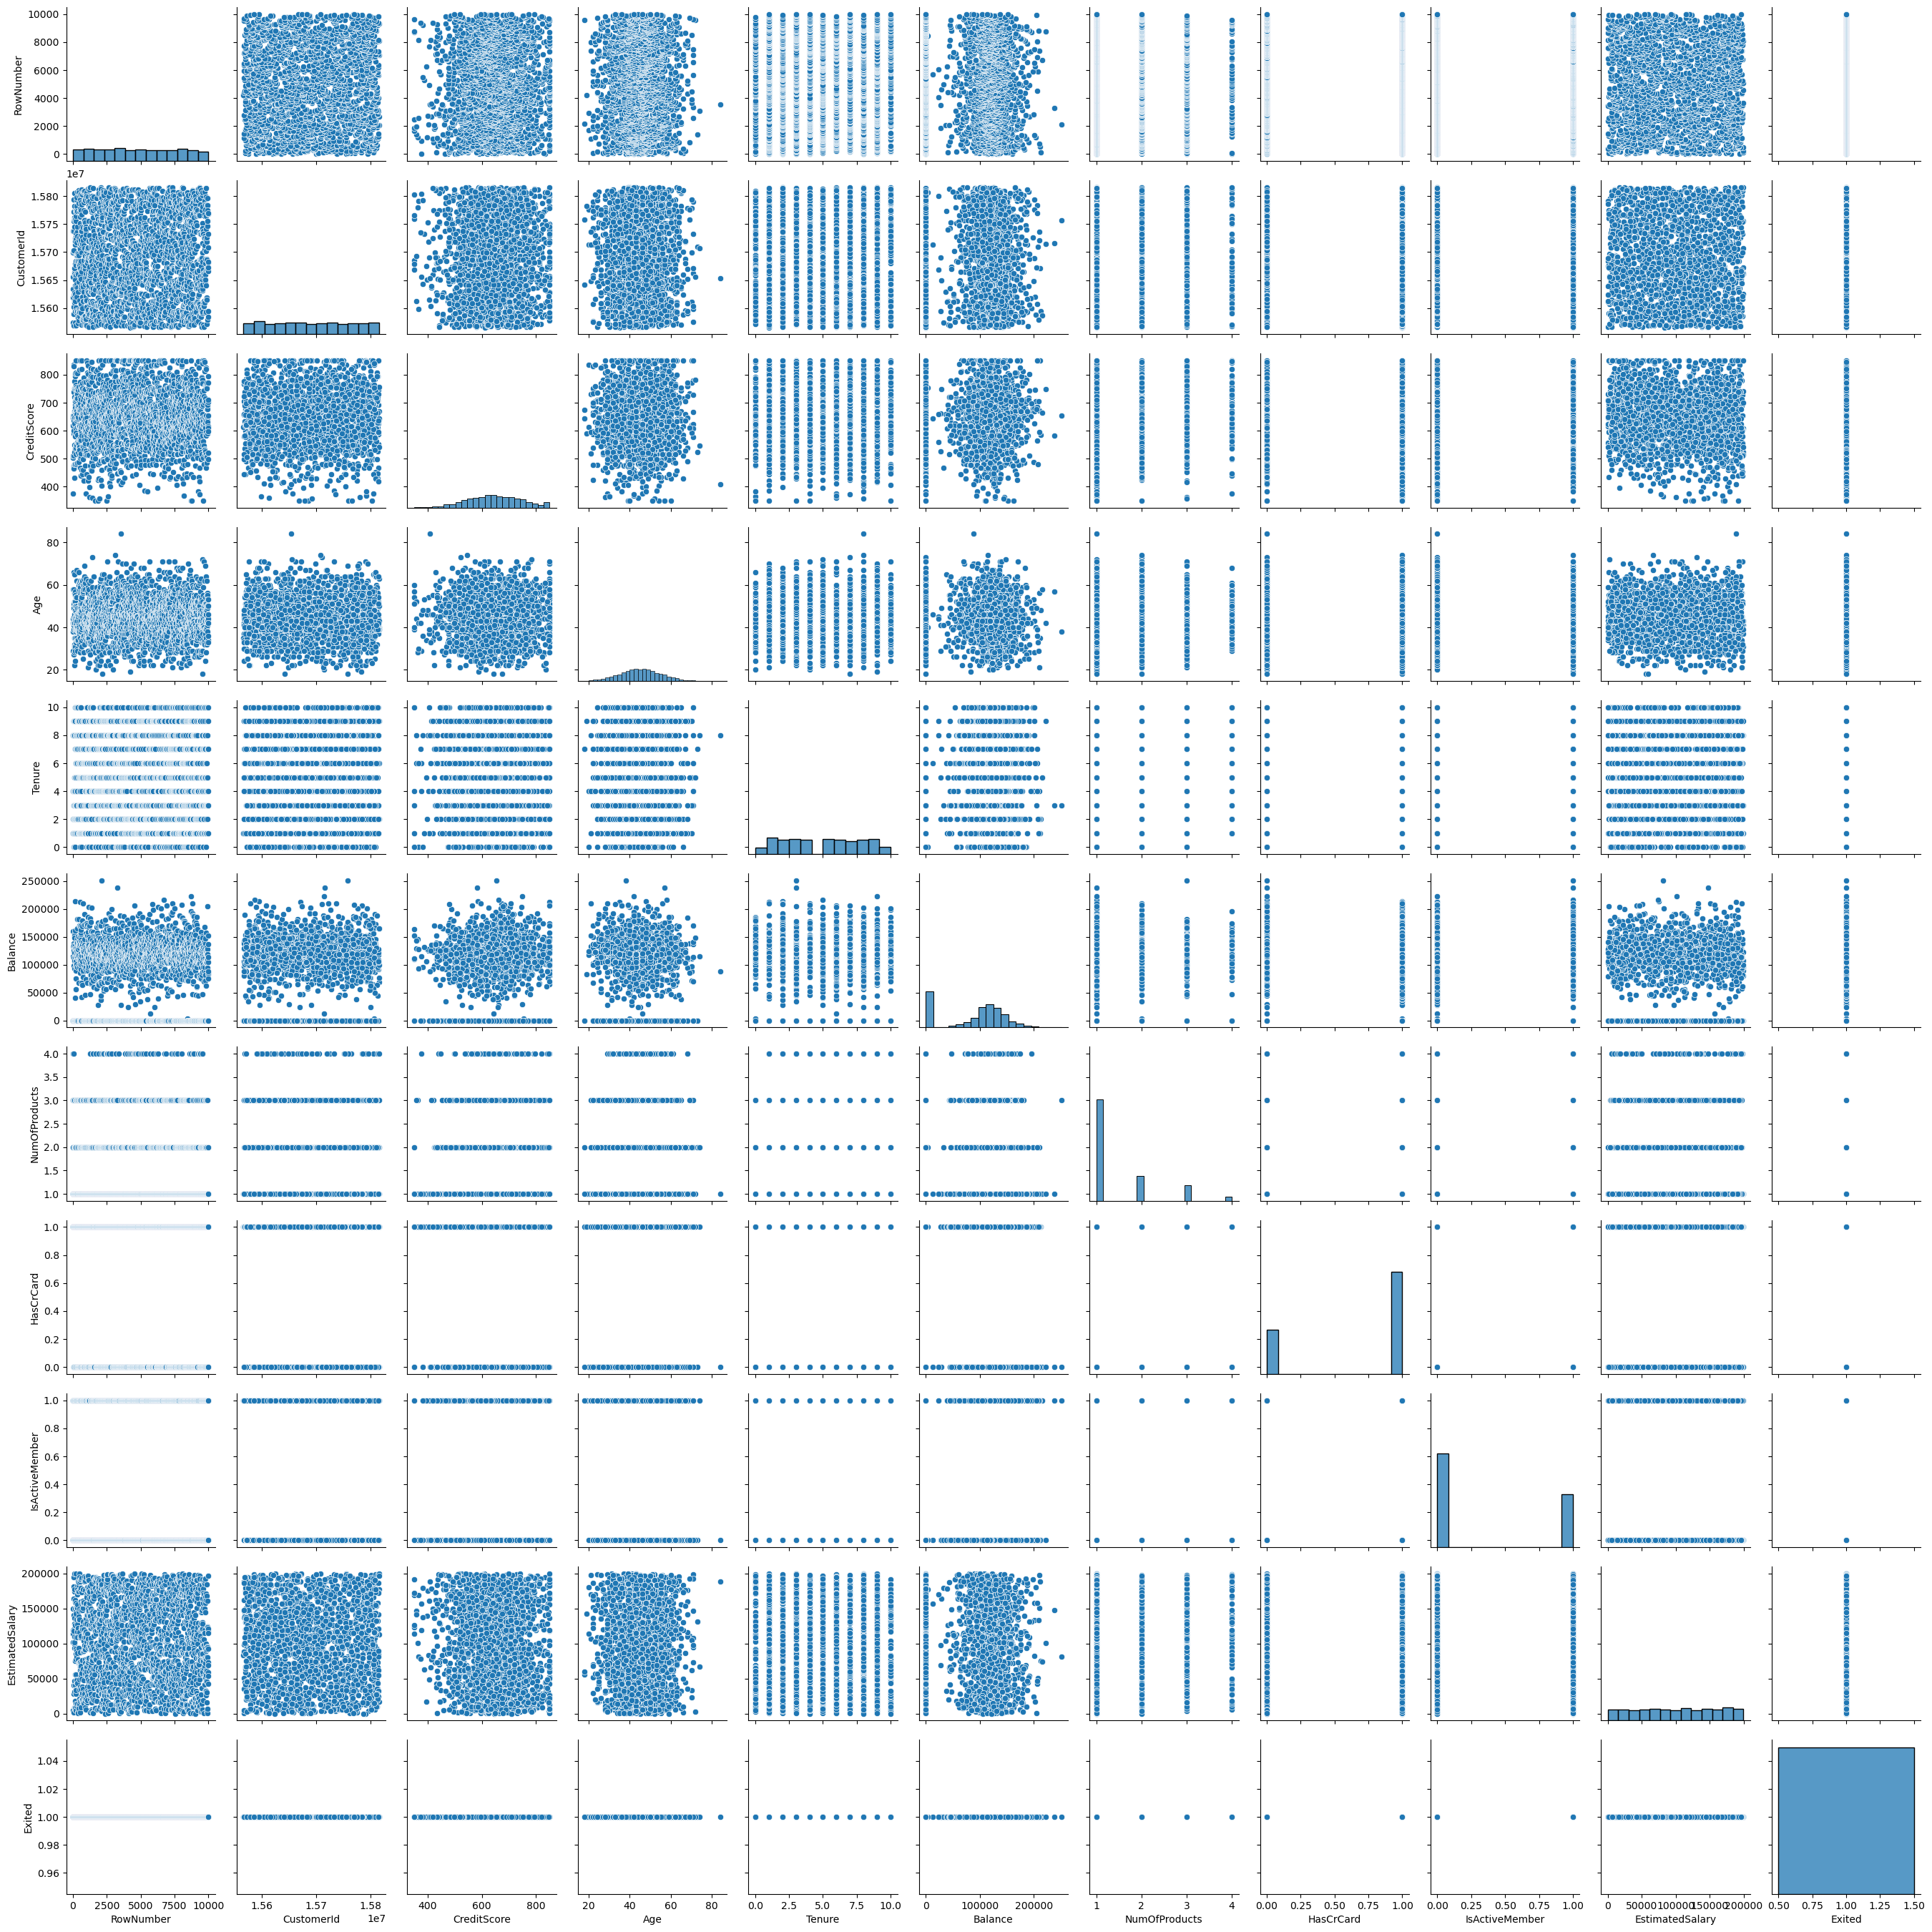

In [63]:
sns.pairplot(churned_customers)

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_22326/664273246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churned_customers.corr(), annot=True)


<Axes: >

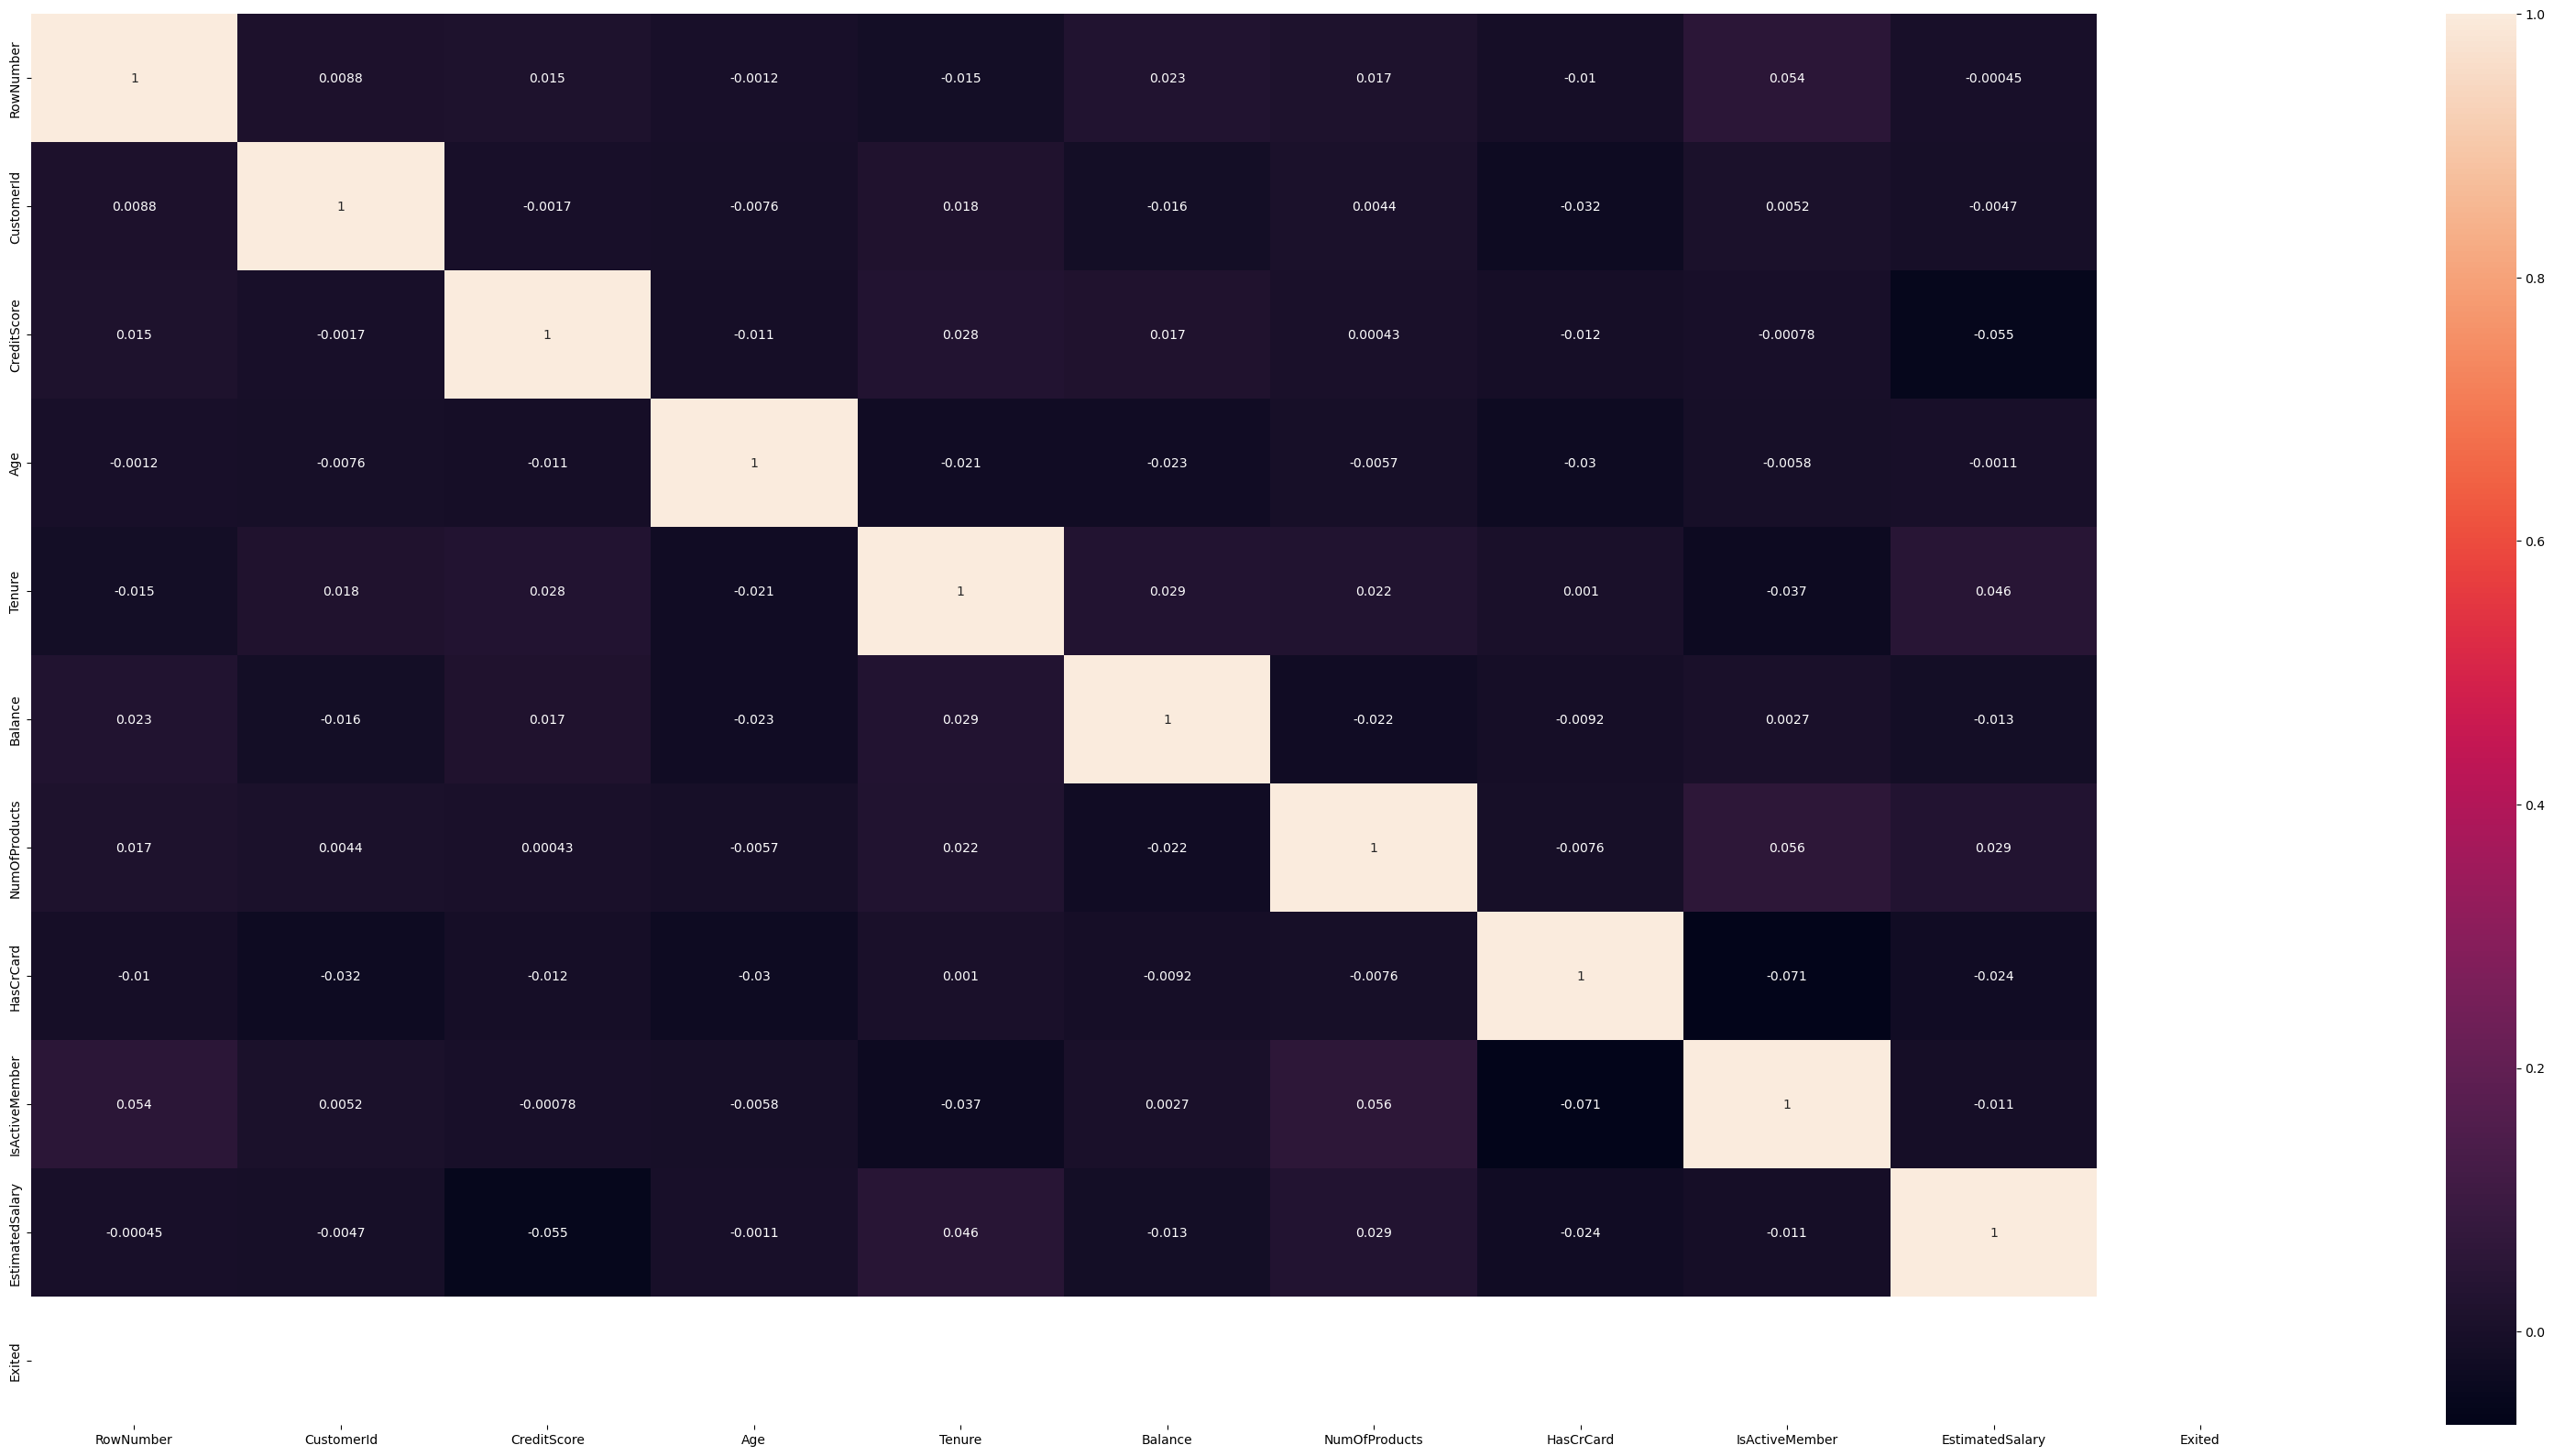

In [64]:
plt.figure(figsize=(40, 20))

sns.heatmap(churned_customers.corr(), annot=True)

In [65]:
#make a balance salary ratio

In [66]:
churn['salary_balance'] = churn['EstimatedSalary']/churn['Balance']


In [67]:
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited binned_credit_score binned_balance  salary_balance  
0        101348.88       1                good          empty             inf  
1        112542.58       0                good        50-100k        1.342864  
2        113931.57       1                  ok       150-200K        0.713585  
3         93826.63       0                good          empty             inf  
4         79084.10       0            excelent       100-150K        0.630098

In [68]:
churn['salary_balance'].isnull().sum()

0

In [69]:
churn['salary_balance'].replace([np.inf], 0)

0       0.000000
1       1.342864
2       0.713585
3       0.000000
4       0.630098
          ...   
9995    0.000000
9996    1.772712
9997    0.000000
9998    1.237271
9999    0.293453
Name: salary_balance, Length: 10000, dtype: float64

/var/folders/mj/zknsgww149qf6c6r1yp4hz2h0000gn/T/ipykernel_22326/3922205894.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn.corr()


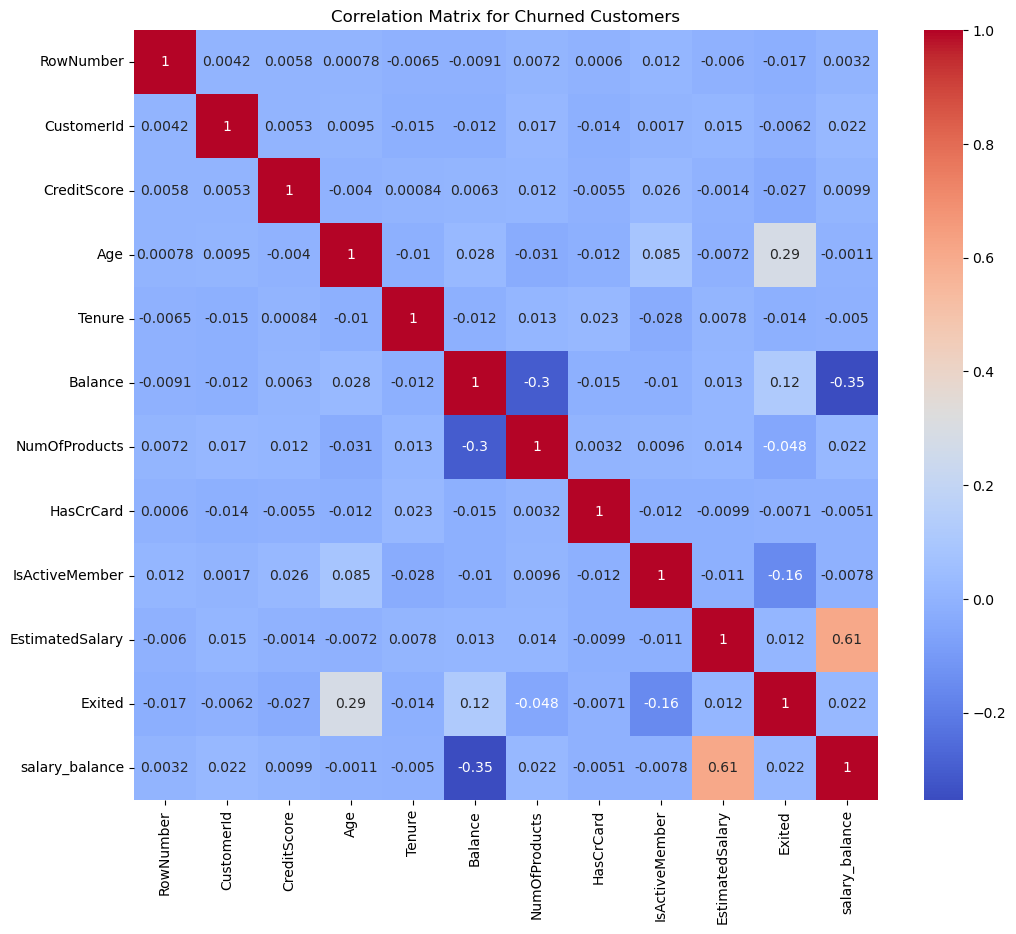

In [70]:
correlation_matrix = churn.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Churned Customers')
plt.show()

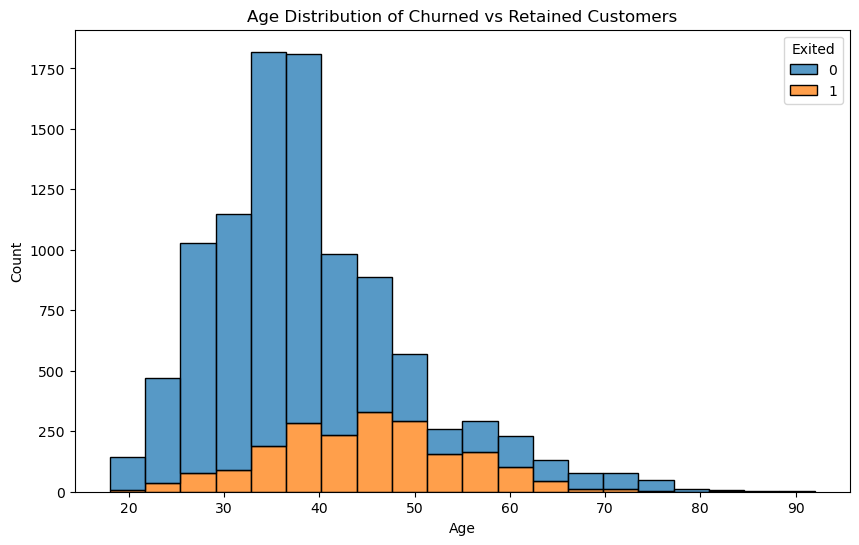

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title('Age Distribution of Churned vs Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [72]:
#seems like middle aged people people are leaving

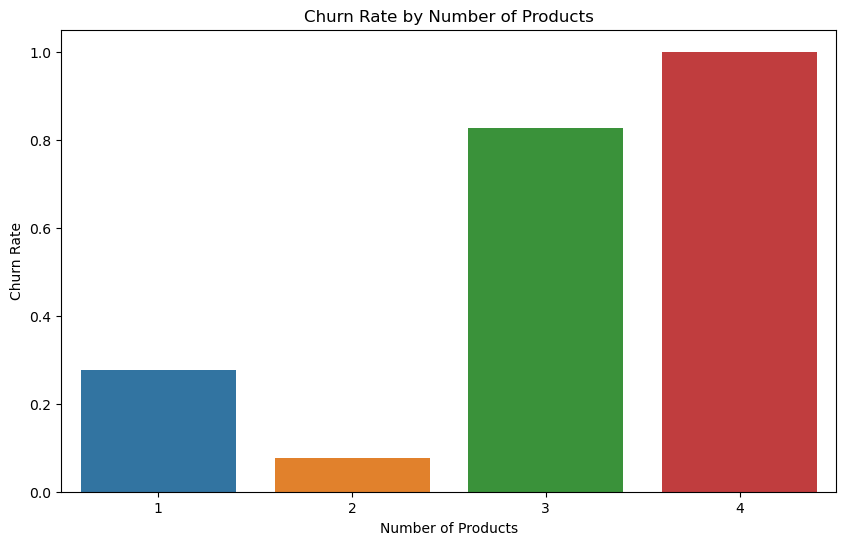

In [73]:
product_churn = churn.groupby('NumOfProducts')['Exited'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=product_churn)
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

In [74]:
#it seems like more products lead to a customer leaving

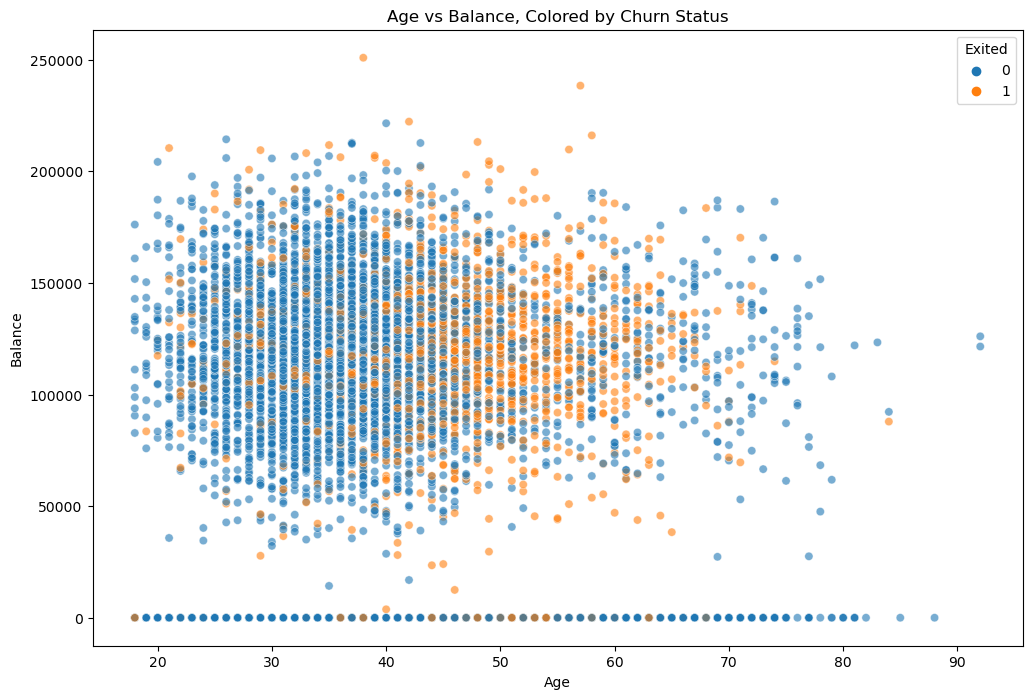

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=churn, x='Age', y='Balance', hue='Exited', alpha=0.6)
plt.title('Age vs Balance, Colored by Churn Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [76]:
# it seems like the middle aged customers that leave have money

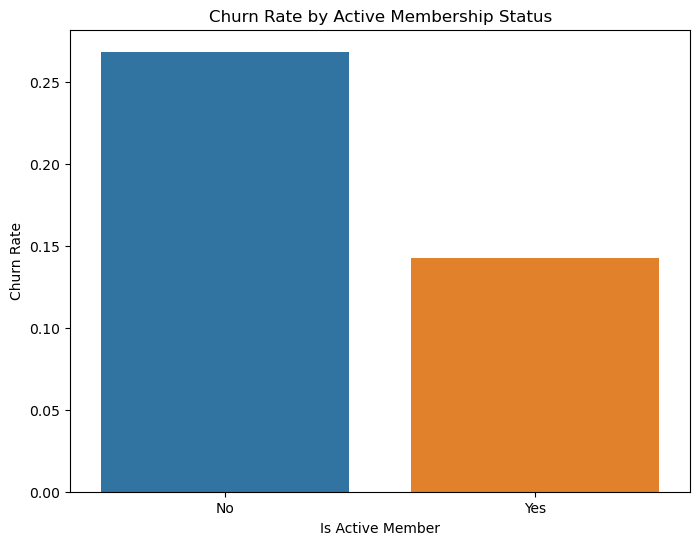

<Figure size 1200x600 with 0 Axes>

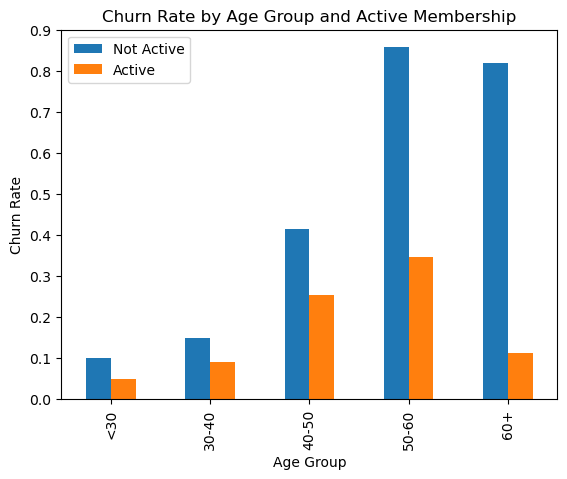

In [77]:
active_churn = churn.groupby('IsActiveMember')['Exited'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=active_churn)
plt.title('Churn Rate by Active Membership Status')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Additional analysis: Churn rate by age group and active membership
churn['AgeGroup'] = pd.cut(churn['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_active_churn = churn.groupby(['AgeGroup', 'IsActiveMember'])['Exited'].mean().unstack()

plt.figure(figsize=(12, 6))
age_active_churn.plot(kind='bar')
plt.title('Churn Rate by Age Group and Active Membership')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.legend(['Not Active', 'Active'])
plt.show()

In [78]:
#if the customer is middle aged, with multiple products, is not active, and has money it seems they are more likely to leave

In [79]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [82]:
churn.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
binned_credit_score      object
binned_balance           object
salary_balance          float64
AgeGroup               category
dtype: object

In [83]:
# we can drop surname, rownumber, geography, 
#we can drop our binned groups like binned_balance,binned_credit_score and AgeGroup
#must convert columns into int64 for modeling

In [84]:
churn = churn.drop(['Surname', 'RowNumber', 'Geography', 'AgeGroup', 'binned_balance', 'binned_credit_score'], axis=1)

In [85]:
churn.dtypes

CustomerId           int64
CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
salary_balance     float64
dtype: object

In [86]:
churn['Balance'] = churn['Balance'].astype('int64')
churn['EstimatedSalary'] = churn['EstimatedSalary'].astype('int64')
churn['salary_balance'] = churn['salary_balance'].replace([np.inf, -np.inf], 0)


In [87]:
churn['salary_balance'] = churn['salary_balance'].astype('int64')

In [88]:
churn.dtypes

CustomerId          int64
CreditScore         int64
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
salary_balance      int64
dtype: object

In [89]:
gender_mapping = {'Male':0, 'Female':1}
churn['Gender']=churn['Gender'].map(gender_mapping)

In [90]:
churn.dtypes

CustomerId         int64
CreditScore        int64
Gender             int64
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
Exited             int64
salary_balance     int64
dtype: object

In [91]:
X = churn.drop(['Exited'], axis=1)  
y = churn['Exited']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

/Users/douglasdomingo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.7936 - loss: 0.5012 - val_accuracy: 0.8269 - val_loss: 0.4209
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8331 - loss: 0.4113 - val_accuracy: 0.8450 - val_loss: 0.3762
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8489 - loss: 0.3639 - val_accuracy: 0.8456 - val_loss: 0.3527
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8542 - loss: 0.3516 - val_accuracy: 0.8537 - val_loss: 0.3541
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8523 - loss: 0.3472 - val_accuracy: 0.8469 - val_loss: 0.3532
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8640 - loss: 0.3420 - val_accuracy: 0.8512 - val_loss: 0.3475
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8616 - loss: 0.3337 - val_accuracy: 0.8500 - val_loss: 0.3455
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8587 - loss: 0

In [96]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8518 - loss: 0.3565
Test accuracy: 0.8555


In [97]:
predictions = model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int).flatten()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predicted_classes))
print(confusion_matrix(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.85      2000

[[1522   85]
 [ 204  189]]


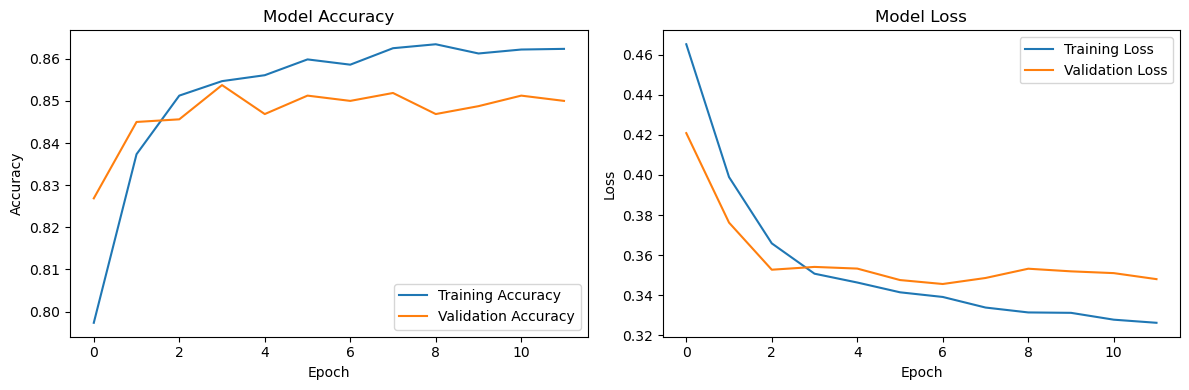

In [99]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# with tensor flow our best model comes in around 85%
# how would other models compare

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7705

In [102]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.861

In [ ]:
#random forest classifier just barely beats our tensorflow model

In [103]:
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

In [ ]:
#adaboost classifier does about the same as our tensorflow model

In [104]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

print('Test scores', test_scores)
print('')
print('Train scores', train_scores)

Test scores [0.6865, 0.7765, 0.736, 0.7875, 0.767, 0.794, 0.777, 0.7965, 0.7905]

Train scores [1.0, 0.836, 0.837, 0.81475, 0.812875, 0.8045, 0.803, 0.79925, 0.798625]


In [105]:
top_model = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
train_acc= knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)
print(train_acc)

0.798625


In [108]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [109]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7964
Best Parameters: {'n_neighbors': 30}


In [ ]:
#KNN with gridsearchCV does not beat our tensor flow model

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':np.arange(1,50)}
rf= RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [111]:
print( "best score" + str(rf_cv.best_score_))
print("best parameters" + str(rf_cv.best_params_))

best score0.8531000000000001
best parameters{'n_estimators': 48}


In [ ]:
#gridsearch CV with random forest is worse than just random foresstclassifier on its own
